# Repaso Quiz Búsquedas

Dado el siguiente grafo de estados:

\begin{align*}
A(h=5)   &: (C, 3),\ (H, 1) \\
B(h=9)   &: (C, 5),\ (F, 5),\ (G, 1) \\
C(h=4)   &: (F, 3),\ (G, 2),\ (H, 2) \\
D(h=7)   &: (F, 4) \\
E(h=8)   &: (A, 2),\ (C, 4),\ (D, 5),\ (G, 1),\ (I, 4) \\
F(h=2)   &: (A, 1),\ (C, 4),\ (D, 1),\ (H, 2),\ (J, 5) \\
G(h=9)   &: (B, 1) \\
H(h=8)   &: (B, 5),\ (E, 1) \\
I(h=12)  &: (E, 2) \\
J(h=0)   &: \\
\end{align*}

Define los 5 primeros estados expandidos usando DFS, UCS y $A^*$ para la busqueda desde $A$ hasta $J$

In [23]:
import sys

sys.path.append("..")

from AI_algorithms.state_graphs import Graph
from AI_algorithms.state_graphs.searchs import AStarSearch, DFSearch, UCSearch

Cargamos el grafo a nuestra estructura establecida

In [24]:
h = {
    'A': 5, 'B': 9, 'C': 4, 'D': 7, 'E': 8, 'F': 2, 'G': 9,
    'H': 8, 'I': 12, 'J': 0
}

c = {
    ('A', 'C'): 3, ('A', 'H'): 1,
    ('B', 'C'): 5, ('B', 'F'): 5, ('B', 'G'): 1,
    ('C', 'F'): 3, ('C', 'G'): 2, ('C', 'H'): 2,
    ('D', 'F'): 4,
    ('E', 'A'): 2, ('E', 'C'): 4, ('E', 'D'): 5, ('E', 'G'): 1, ('E', 'I'): 4,
    ('F', 'A'): 1, ('F', 'C'): 4, ('F', 'D'): 1, ('F', 'H'): 2, ('F', 'J'): 5,
    ('G', 'B'): 1,
    ('H', 'B'): 5, ('H', 'E'): 1,
    ('I', 'E'): 2,
}

G = Graph(c,h)
G.print_structure()

A(h =  5)  :  (C,3), (H,1)
B(h =  9)  :  (C,5), (F,5), (G,1)
C(h =  4)  :  (F,3), (G,2), (H,2)
D(h =  7)  :  (F,4)
E(h =  8)  :  (A,2), (C,4), (D,5), (G,1), (I,4)
F(h =  2)  :  (A,1), (C,4), (D,1), (H,2), (J,5)
G(h =  9)  :  (B,1)
H(h =  8)  :  (B,5), (E,1)
I(h = 12)  :  (E,2)
J(h =  0)  :  


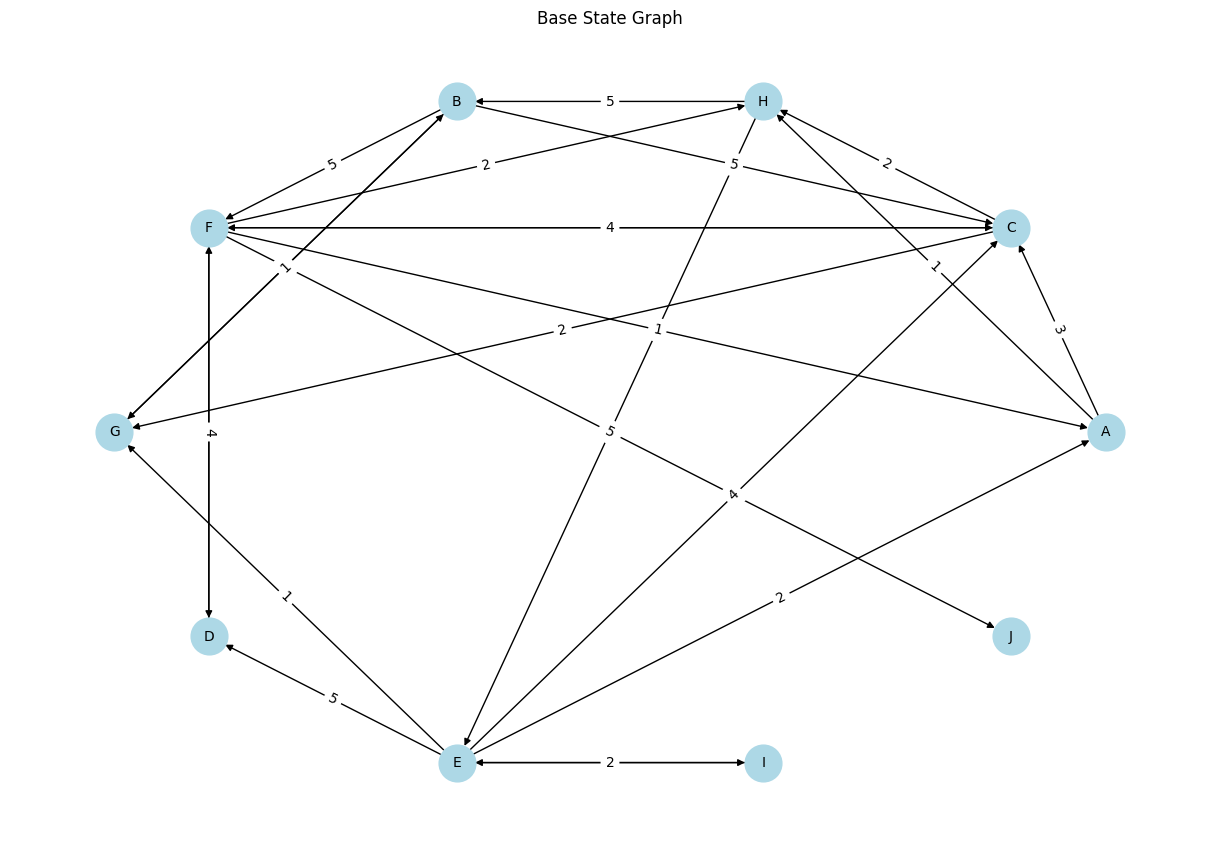

In [25]:
G.draw(title="Base State Graph")

## DFS

In [26]:
path = DFSearch(G, 'A', 'J',criteria = 'descending label', verbose=True)

Out: A  -  Fridge: ['A']
Out: C  -  Fridge: ['H', 'C']
Out: F  -  Fridge: ['H', 'G', 'F']
Out: D  -  Fridge: ['H', 'G', 'J', 'D']
Out: J  -  Fridge: ['H', 'G', 'J']

Out order: A C F D J


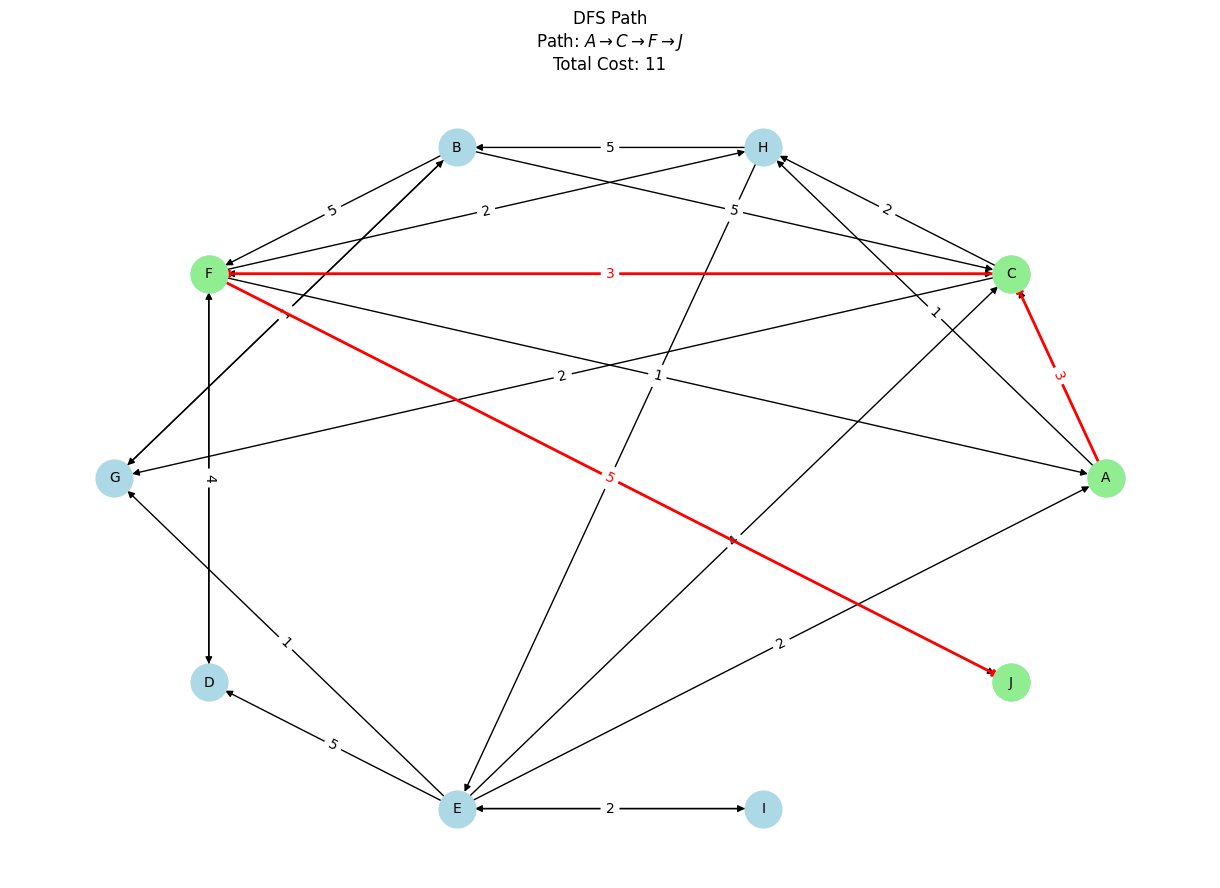

In [27]:
G.draw(path = path, title="DFS Path")

Para este escenario, la respuesta es: $A C F D J$

## UCS

In [28]:
path = UCSearch(G, 'A', 'J', verbose=True, reached=False)

Out: A g: 0  
Out: H g: 1  
Out: E g: 2  
Out: C g: 3  
Out: G g: 3  
Out: A g: 4  
Out: B g: 4  
Out: G g: 5  
Out: G g: 5  
Out: H g: 5  
Out: H g: 5  
Out: B g: 6  
Out: B g: 6  
Out: B g: 6  
Out: C g: 6  
Out: E g: 6  
Out: E g: 6  
Out: F g: 6  
Out: I g: 6  
Out: A g: 7  
Out: C g: 7  
Out: D g: 7  
Out: D g: 7  
Out: G g: 7  
Out: G g: 7  
Out: G g: 7  
Out: G g: 7  
Out: G g: 7  
Out: A g: 8  
Out: A g: 8  
Out: B g: 8  
Out: B g: 8  
Out: B g: 8  
Out: B g: 8  
Out: B g: 8  
Out: E g: 8  
Out: G g: 8  
Out: H g: 8  
Out: H g: 8  
Out: H g: 8  
Out: B g: 9  
Out: C g: 9  
Out: E g: 9  
Out: E g: 9  
Out: E g: 9  
Out: F g: 9  
Out: F g: 9  
Out: G g: 9  
Out: G g: 9  
Out: G g: 9  
Out: G g: 9  
Out: G g: 9  
Out: G g: 9  
Out: G g: 9  
Out: H g: 9  
Out: H g: 9  
Out: H g: 9  
Out: A g: 10 
Out: A g: 10 
Out: A g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: B g: 10 
Out: C g: 10 
Out: C g: 10 
Out: C

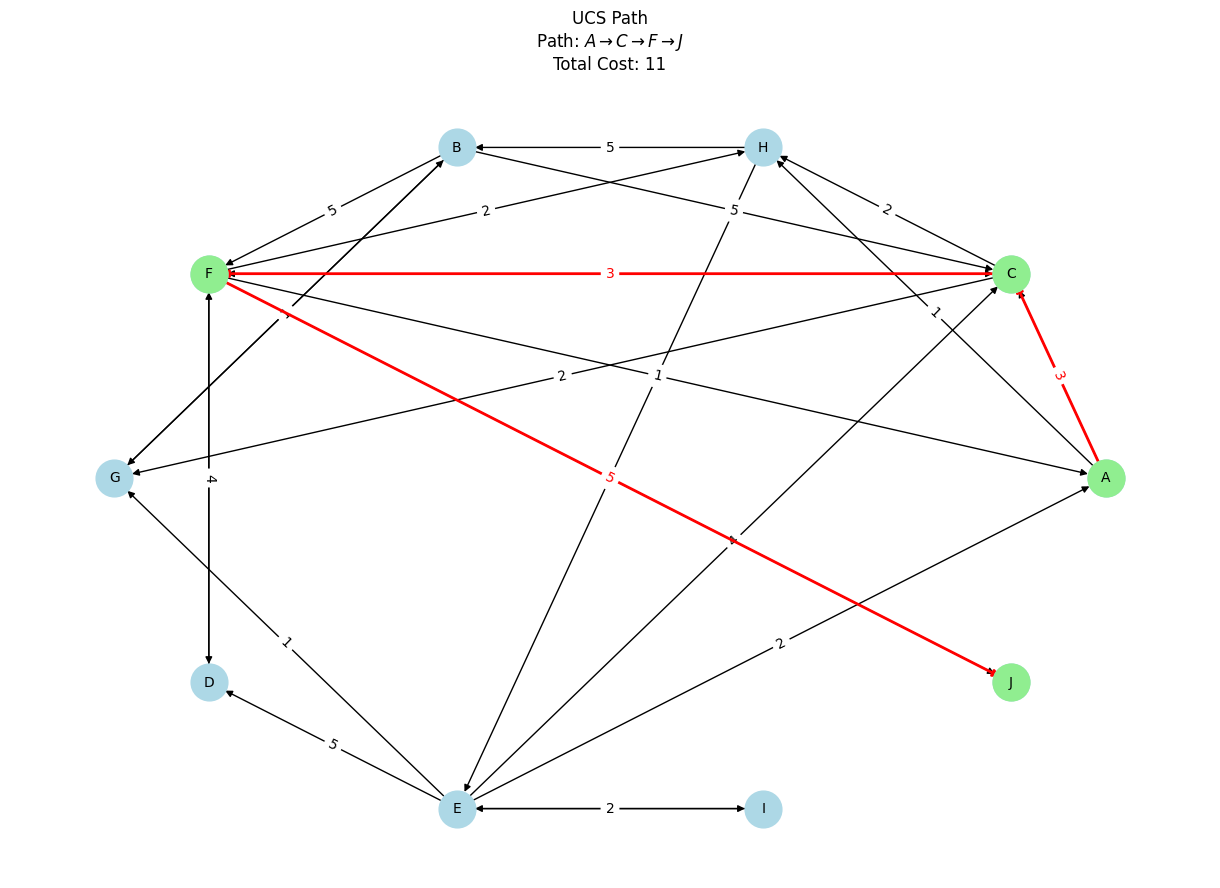

In [29]:
G.draw(path = path, title="UCS Path")

Para este escenario, la respuesta es: $A H E C G$

## $A^*$

In [30]:
path = AStarSearch(G, 'A', 'J', verbose=True, reached = False)

Out: A g: 0   h: 5   f: 5  
Out: C g: 3   h: 4   f: 7  
Out: F g: 6   h: 2   f: 8  
Out: H g: 1   h: 8   f: 9  
Out: E g: 2   h: 8   f: 10 
Out: A g: 4   h: 5   f: 9  
Out: C g: 6   h: 4   f: 10 
Out: C g: 7   h: 4   f: 11 
Out: F g: 9   h: 2   f: 11 
Out: J g: 11  h: 0   f: 11 

Out order: A C F H E A C C F J


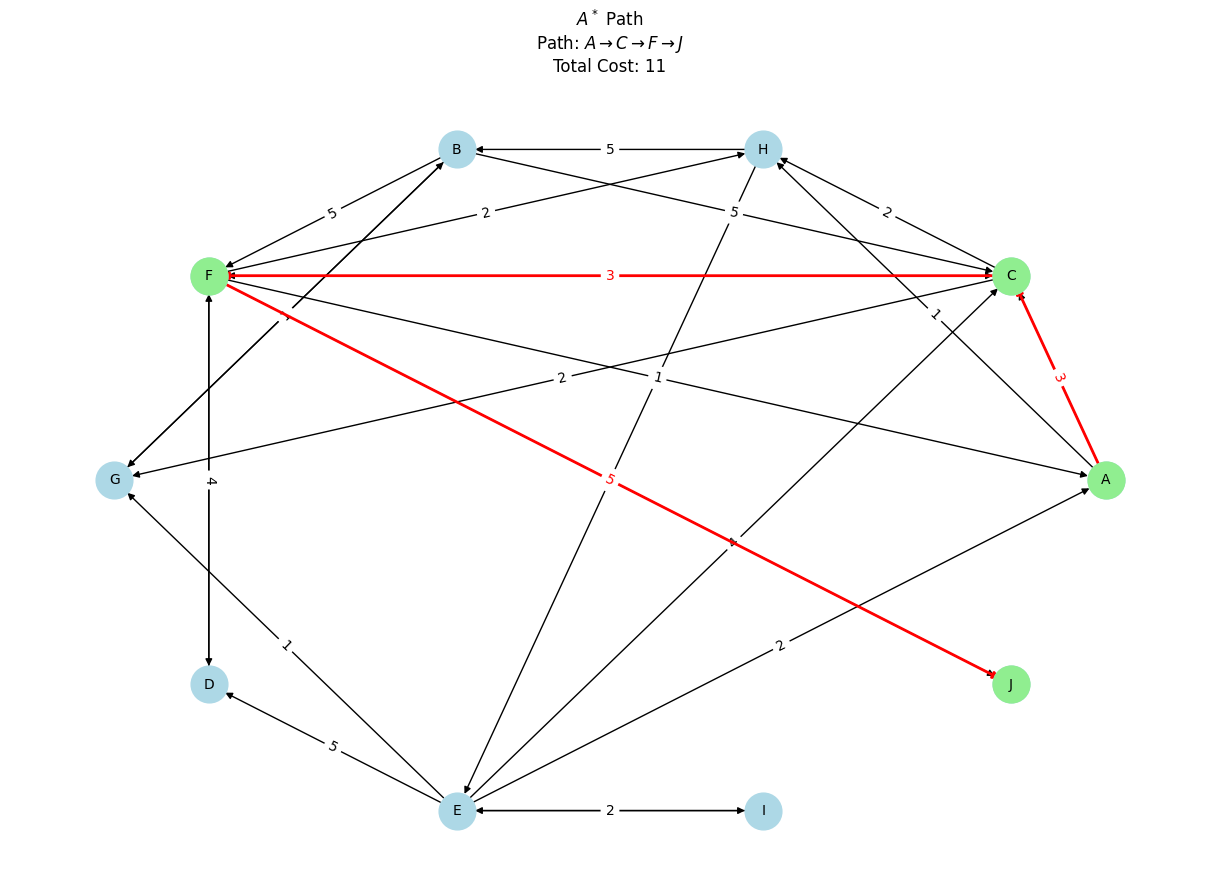

In [31]:
G.draw(path = path, title="$A^*$ Path")

Para este escenario, la respuesta es: $A C F H E$